## Exercise 5 on PCA: "Eigenfaces", or the principal components of a dataset of images

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla
import pickle
from sklearn.utils import Bunch


In this exercise, we look at the [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/), which is a dataset of images of faces of famous people.
We'll compute its principal components (the singular values of the data matrix). This will allow us to explore a bit this high-dimensional dataset.


We start by loading the dataset. Normally you could download it directly through sklearn (see code below). But to avoid long waiting times on noto we also provide the pickled sklearn bunch object on moodle and you can upload it into your noto environment. 

In [164]:
load_pickled_data = True

if load_pickled_data:
    with open('faces.pickle', 'rb') as handle:
        faces = pickle.load(handle)
else:
    # This .pickle object was created by the following code: 
    # (you can use it to load the data from sklearn yourself, but download seems slow in noto)
    from sklearn.datasets import fetch_lfw_people
    min_faces_per_person = 30
    faces = fetch_lfw_people(min_faces_per_person=min_faces_per_person)

The code below shows how to save a python object using [pickle](https://wiki.python.org/moin/UsingPickle). 
Note that for numerical data there exist more interoperable and safer (pickle is vulnerable to arbitrary code execution) ways to save data to disk, e.g. using [numpy.savez()](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)

In [165]:
with open('faces.pickle', 'wb') as handle:
    pickle.dump(faces, handle)

1. Start by understanding in what kind of object the data is packaged. Look at the `sklearn.utils.Bunch` or `fetch_lfw_people()` documentation, print yourself the shapes of the arrays contained in faces, etc. Depending on where you get your data from, you will often find different formats or python objects. Then, plot the first 10 images (use `plt.imshow`) and put the corresponding names as `plt.title`.

In [166]:
# explore a bit shape, dtype, ...
print(faces.keys())
print(np.shape(faces.images))


dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
(2041, 62, 47)


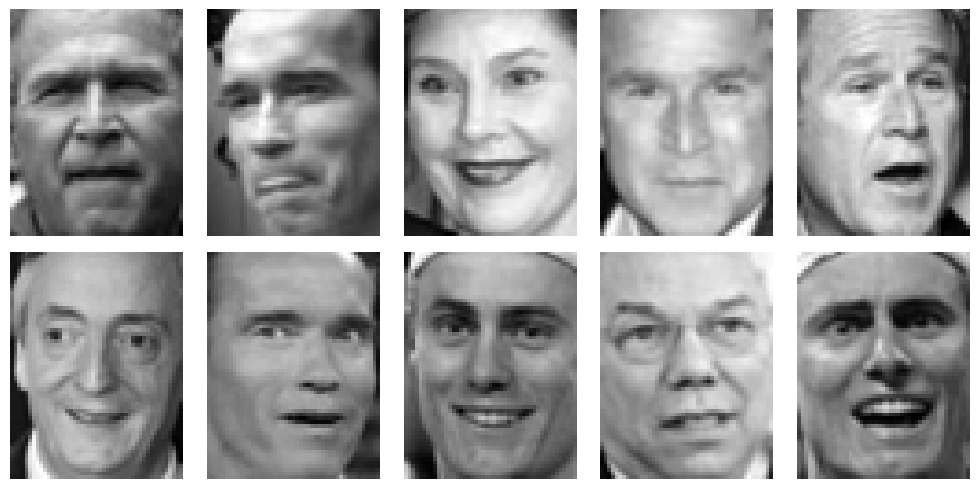

In [167]:
images = faces["images"][:10]
fig,ax = plt.subplots(2,5, figsize=(10,5))
ax=ax.ravel()

for i, (img,ax) in enumerate(zip(images,ax)):
    ax.imshow(img,cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

2. The number of pictures per person is not the same. How many are there for each of them? In order to obtain a balanced dataset, keep only 30 pictures per person.  
   Unbalanced data (different #samples per class/characteristic) is an ubiquitous phenomenon and causes all kinds of biases in ML. Be aware of it... 


In [168]:
# print the #samples for each person.
# Hint:  try out "fancy indexing": array[(condition)]
print(faces.target.shape)

unique, counts = np.unique(faces.target, return_counts=True)
print(dict(zip(unique,counts)))

(2041,)
{0: 39, 1: 35, 2: 36, 3: 77, 4: 42, 5: 236, 6: 31, 7: 121, 8: 201, 9: 109, 10: 44, 11: 30, 12: 39, 13: 71, 14: 52, 15: 55, 16: 42, 17: 53, 18: 31, 19: 60, 20: 32, 21: 41, 22: 41, 23: 48, 24: 33, 25: 37, 26: 30, 27: 32, 28: 52, 29: 33, 30: 33, 31: 144, 32: 32, 33: 49}


In [169]:
# Keep only 30 samples per person.
# Hint: a standard way to get the indices where a condition is true is np.nonzero(condition).
#       (np.where() or np.argwhere() are made for slightly different things)
#
indices = np.hstack([np.where(faces["target"] == target)[0][:30] for target in np.unique(faces["target"])])
faces["images"] = faces["images"][indices]
faces["target"] = faces["target"][indices]

unique, counts = np.unique(faces.target, return_counts=True)
print(dict(zip(unique,counts)))

{0: 30, 1: 30, 2: 30, 3: 30, 4: 30, 5: 30, 6: 30, 7: 30, 8: 30, 9: 30, 10: 30, 11: 30, 12: 30, 13: 30, 14: 30, 15: 30, 16: 30, 17: 30, 18: 30, 19: 30, 20: 30, 21: 30, 22: 30, 23: 30, 24: 30, 25: 30, 26: 30, 27: 30, 28: 30, 29: 30, 30: 30, 31: 30, 32: 30, 33: 30}


3. By using [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) compute the principal components and print their shape. Would this shape be expected?


In [300]:
# Do PCA on the dataset using sklearn
import sklearn.decomposition as dc
pca = dc.PCA().fit(faces.data)

In [216]:
# print the shape
pca.components_.shape

(2041, 2914)

4. Plot the first five principal components (the eigenfaces!), what do they look like?

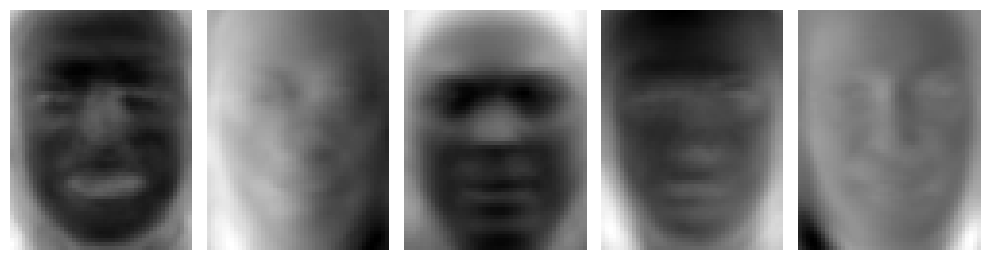

In [301]:
# Plot the first 5 principal components. Hint: need to reshape the vectors to 2d images.
a = pca.components_.reshape((2041, 62, 47))
a = a[:5]
fig,ax = plt.subplots(1,5, figsize=(10,5))
ax=ax.ravel()

for i, (img,ax) in enumerate(zip(a, ax)):
    ax.imshow(img,cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()


5. The proportion of the variance explained by each principal component (i.e. eigenvector of the covariance matrix) to the total variance in the data can be computed by dividing the corresponding eigenvalue by the trace of the covariance matrix. Plot the cumulative explained variance (when taking more and more components into account) by using the attribute explained variance ratio . How many principal components do we need in order to explain the majority (e.g. 0.9) of the variance of our faces? Is there a way to choose a good cut-off if we want to use PCA for dimensionality reduction?


(2041, 2914)


Text(0, 0.5, 'cumulative explained variance')

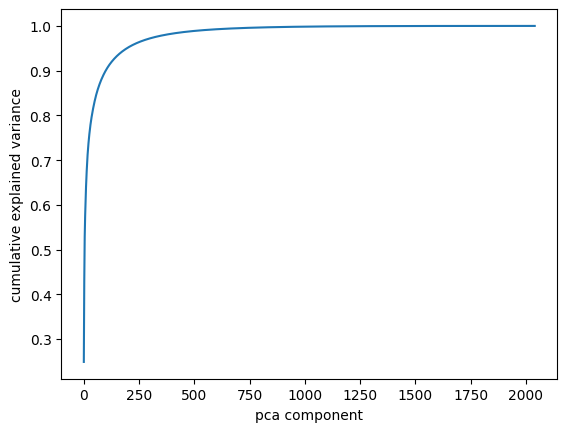

In [207]:
# Plot the cumulative explained variance of the principal compoments
print(pca.components_.shape)

plt.plot(range(0,len(pca.explained_variance_)), pca.explained_variance_ratio_.cumsum()) # todo
plt.xlabel("pca component")
plt.ylabel("cumulative explained variance")

6. Compute and plot the projections of four pictures on the first { 10, 30, 100, 300, 1000 } principal components. Hint: the functions to do the projection are already there in the sklearn PCA object.  
   What do you observe? When do the faces become recognizable to you?

In [320]:
# Implement a function which makes the plot given a number of components, a PCA object, and the data samples. 
# (We'll use this function also in the next question)
# Hint: use plt.subplots() to make a figure with several panels, one for each image.

def show_projected_images(n_components, pca_object, images):
    nsamples=images.shape[0]
    tf = pca_object.transform(images)
    tf[:, n_components:]=0
    tf_inv = pca_object.inverse_transform(tf).reshape((nsamples,62, 47))
    fig, axes = plt.subplots(1, 4)
    for i, ax in enumerate(axes.flat):
        ax.imshow(tf_inv[i], cmap='gray')
    pass # todo


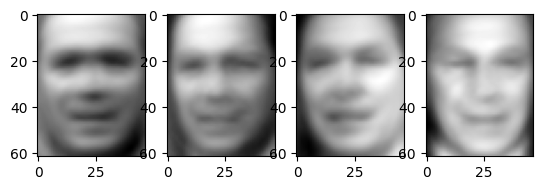

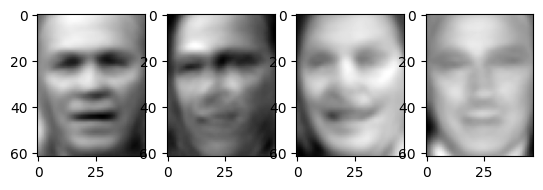

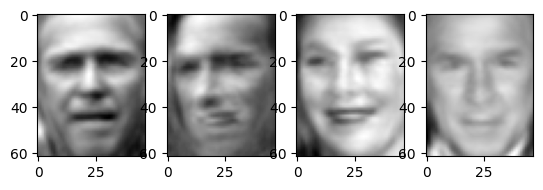

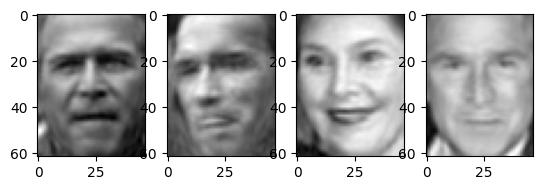

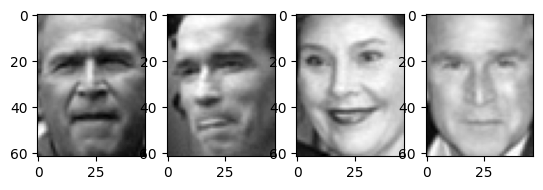

In [321]:
# use the show_projected_images() function 
components_list = [10, 30, 100, 300, 1000]

for n in components_list:
    show_projected_images(n, pca, faces.data)

8. Foreshadowing kernels, & the nonlinear model zoo  
   We now play the "naive" machine learning game, that is we take the next-best nonlinear method and apply it to our data. It will work great, right?  
   Instead of the PCA method, try out KernelPCA as a drop-in replacement (it's also in sklearn). This method does PCA in an infinite-dimensional, non-linear "feature space". How it works will be explained later on in the lectures and is quite fundamental for understanding more modern and complex ML models.  
   Apply KernelPCA with the kernels {'linear', 'poly', 'cosine', 'rbf'}, and again plot the projections of four pictures on the first 100 components for each of these. What do you observe? What do you think: Is using a fancy method a good idea, also if we do not understand in what ways it may fail? Is it different in science and industrial application, or what does it depend on?

In [117]:
# hint: you'll need to set fit_inverse_transform=True

kernels_list = ['linear', 'poly', 'cosine', 'rbf']

